# Trade Stock Options with Machine Learning

Use the fortune_teller json file to find how you can get rich trading options with Python Machine learning.
Print the data for each key in the dictionary.

Nortes for Improvement
1.Use my standard header block.
2. Delete the jjoke code below.
3. Feature the visualization of feature variance.

In [1]:
import json
with open('fortune_teller.json') as json_file:
   fortune_teller_dict = json.load(json_file)
print(fortune_teller_dict['Question1'])
print(fortune_teller_dict['Question2'])
print(fortune_teller_dict['Answer1'])
print(fortune_teller_dict['Answer2'])

Can you get rich trading options with Machine Learning?
Can you get rich working with Machine Learning in Python?
Probably not.
Maybe so.


Print the data for keys 'Answer1' and Answer2' to find the answers.

In this notebook you will use Machine Learners in SKLearn to find profitable stock option trades. This notebook uses a data set of 10,400 stock option trades for ExxonMobil (XOM) from 2017-2018 to illustrate many aspects of Machine Learning (ML) with the python SKLearn library. All the trades are short covered calls. 

What You Need: Basic knowledge of Python, pandas, numpy, dataframes, and statistics. 

What You Don't Need: Knowledge of stock options, scipy, or machine learning. This project is self-contained and you will learn as you go.

You will Learn:

 - How to create a feature set for a machine learner (Learner).
 
 - How to create labels and adjust labels.
 
 - How to test different Learners that do classification.
 
 - How to optimize results.
 

Project Outline

Section 1: Explore the feature dataframe

Section 2: Visualize the feature set

Section 3: Improve the feature Set

Section 4: Grid Search

Section 5: Test different Classifiers

Section 6: Change the Rules to Get Better Results. Tune the Label.

Section 7: Final Exam - Find the Best Option Trades


## Section 1 - Explore the Data 

Load the csv file training_features.csv into a dataframe.

In [2]:
import pandas as pd
import numpy as np
training_features = pd.DataFrame()
training_features = pd.read_csv('training_features_wlabel.csv', index_col = False)
print(training_features.head(5))
print(training_features.columns.to_list())

   Unnamed: 0  stock_price_at_STO_offer  STO_strike  STO_days_long  \
0           0                     81.82        80.0             11   
1           1                     81.81        80.0             11   
2           2                     81.82        80.5             11   
3           3                     81.81        80.5             11   
4           4                     82.10        80.5             11   

   STO_offer_ARR  stock_price_at_open  STO_ask_fee%  STO_offer_strike_delta%  \
0       0.786760                82.10      0.023711                -0.022244   
1       0.784828                82.10      0.023652                -0.022124   
2       0.618458                82.10      0.018638                -0.016133   
3       0.608394                82.10      0.018335                -0.016013   
4       0.701224                82.14      0.021133                -0.019488   

   STO_open_strike_delta%  Closed_xtn_Profit$  ...  4 days old  5 days old  \
0               -0.0

Print a list of the column names.
How many features are in this data set?
Describe the types of features.

Column Name Abbreviations
STO - 'Sell to Open.' 


Evaluation: Do think these features are adequate to predict the profitability of this type of option trade?

## Section 2 - Visualize the Feature Set

With Matplotlib, compare the features when grouped by proitable trades ('winners' with label = 1) vs. unprofitable trades ('losers' with label = 0). 

(8000, 28)
winners = 
      Unnamed: 0  stock_price_at_STO_offer  STO_strike  STO_days_long  \
0           1824                     83.07        84.5             21   
1           7115                     86.68        87.5             29   
3            866                     82.23        84.0              9   
4            846                     82.18        80.5              9   
5           1615                     82.74        82.0             24   
...          ...                       ...         ...            ...   
7991        8220                     76.56        78.0             15   
7993        9334                     74.46        76.5             24   
7994        9279                     74.92        76.0             17   
7995        8527                     76.52        78.0             35   
7997        1973                     81.05        81.0             29   

      STO_offer_ARR  stock_price_at_open  STO_ask_fee%  \
0          0.078462                83.30   

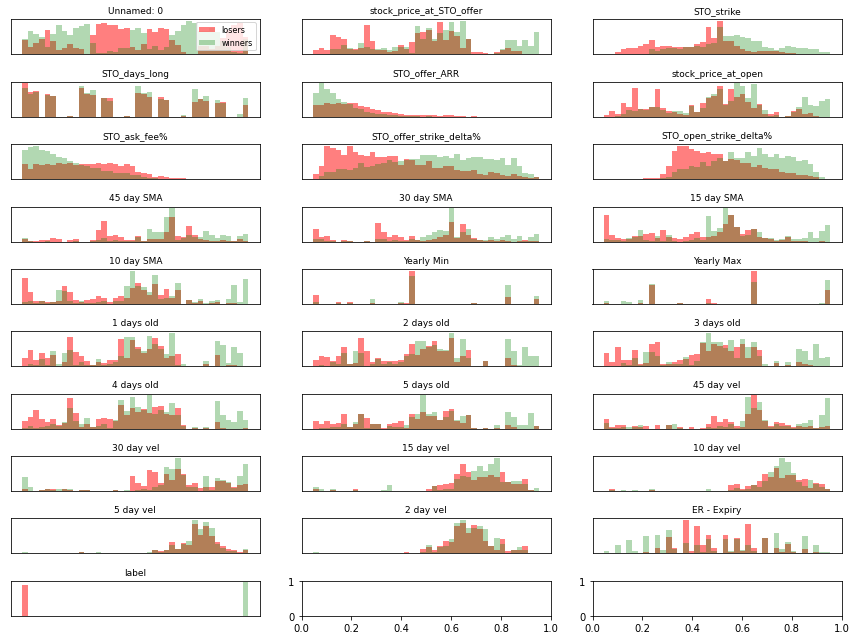

In [3]:
import matplotlib
import matplotlib.pyplot as plt

opt_sample = pd.read_csv('opt_sample.csv')
print(opt_sample.shape)
fig,axes =plt.subplots(10,3, figsize=(12, 9)) # 3 columns each containing 9 figures, total 27 features
winners = opt_sample[opt_sample['label']==1]    # define winners
losers  = opt_sample[opt_sample['label']==0]    # define losers
print('winners = ')
print(winners)

winners = winners.to_numpy()
losers  = losers.to_numpy()
opt_np = opt_sample.to_numpy()

ax=axes.ravel()# flat axes with numpy ravel

print('setting up bins.') 
for i in range(len(opt_sample.columns.values)):
  _,bins=np.histogram(opt_np[:,i],bins=40)
  
  ax[i].hist(losers[:,i],bins=bins,color='r',alpha=.5)# red color for malignant class
  ax[i].hist(winners[:,i],bins=bins,color='g',alpha=0.3)# alpha is           for transparency in the overlapped region
  print('assigned histogram, now try labels.')
  ax[i].set_title(opt_sample.columns.values[i],fontsize=9)
  ax[i].axes.get_xaxis().set_visible(False) # the x-axis co-ordinates are not so useful, as we just want to look how well separated the histograms are
  ax[i].set_yticks(())
ax[0].legend(['losers','winners'],loc='best',fontsize=8)
plt.tight_layout()# let's make good plots
plt.show()


In the thumbnail charts, which features show better separation between winning and losing trades? Look at the bottom chart on the left. It shows perfect separation between the loising trades (red bar) and winning trades (green bar). Wait a minute, that's no feature! it is the label. No wonder it has perfect separation. 

Scale the feature data with StandardScaler
         Why scale the data? How does StandardScaler do the scaling?
     Reduce the feature count with SKLearn Variancethreshold.
         How does VarianceThreshold work?
         Which features did it eliminate? 
     Use PCA to reduce dimensionality. 
         Describe PCA. Why reduce dimensionality? 
         Plot the data with 2-D PCA. What does the plot tell you?
     Train and test SVC against the new data set.
         Compare accuracy and precision-recall for the two runs.


## Section 4 - First, Search the Grid

Section 4: Grid Search
     Run GridSearchCV on the data set.
         What does GridSearch do?
         How did it do on this data set?
         
         
         Do a matplot lib visualization of a grid search with a 2D gric.


## Section 5 - Test Different Classifiers

Review the function to train, test, and measure different classifiers. Review and run the function in the code.

In [4]:
def RunLearners(Xr_train, Xr_test, yr_train, yr_test, all_run_stats, run_ID):
    
   this_run_stats = pd.DataFrame()
   
   learners = {'RandomForest_d3': RandomForestClassifier(max_depth=3, random_state=97),
               'RandomForest_d6': RandomForestClassifier(max_depth=6, random_state=97),
               'RandomForest_d9': RandomForestClassifier(max_depth=9, random_state=97),
               'KNNeighbors_3'    : KNeighborsClassifier(n_neighbors=3),
               'KNNeighbors_5'    : KNeighborsClassifier(n_neighbors=5),
               'KNNeighbors_8'    : KNeighborsClassifier(n_neighbors=8),
               'MLPerceptron'   : MLPClassifier(alpha=1, max_iter=1000),
               'SVC linear'     : svm.SVC(kernel = 'linear'),
               'SVC poly'       : svm.SVC(kernel = 'poly'),
               'SVC sigmoid'    : svm.SVC(kernel = 'sigmoid')
               }

   learner_types = learners.keys()
   for learner in learner_types:
      clf = learners[learner]
      clf.fit(Xr_train, yr_train)
      yr_pred = clf.predict(X_test)

      print()
      print('for learner ', learner)
      print(learner, ' accuracy      = ', metrics.accuracy_score(yr_test, yr_pred))
      print(learner, ' avg. precison = ', metrics.average_precision_score(yr_test, yr_pred))

      this_run_stats.loc[learner, 'Accuracy'] = metrics.accuracy_score(yr_test, yr_pred)
      this_run_stats.loc[learner, 'Precision'] = metrics.average_precision_score(yr_test, yr_pred)

   this_run_stats['run_ID'] = run_ID
   all_run_stats = all_run_stats.append(this_run_stats)
   print('all_run_stats = ')
   print(all_run_stats)      


Use the code block below to call the RunLearners function and collect performance metrics.

In [5]:
X_train = pd.DataFrame()
y_train = pd.DataFrame()
X_test  = pd.DataFrame()
y_test  = pd.DataFrame()

run_stats = pd.DataFrame()

X_train = pd.read_csv('opt_sample.csv', index_col = False)
#print(X_train.head(10))
y_train = X_train[['label']].to_numpy()
y_train = y_train.ravel()
#print(y_train.shape)
X_train.drop(labels = 'label', axis = 'columns', inplace = True)
#print(X_train.shape)

X_test = opt_test
y_test = X_test[['label']].to_numpy()
X_test.drop(labels = 'label', axis = 'columns', inplace = True)

y_train = np.ravel(y_train)
y_test  = np.ravel(y_test)
#print('y_train = ', y_train)
#print('y_test = ', y_test)

run_ID = 'Initial'
RunLearners(X_train, X_test, y_train, y_test, learner_stats, run_ID)



NameError: name 'opt_test' is not defined

Compare results for the classifiers. Why do you think some classifiers do so much better than others?

Add another classifier to the list. Add some additional values to the parameters to the classifiers. Can you get better performance?

What else would you like to measure? Add them to the performance df. 

Would you use any of these classifiers to trade stock options? Why or not?

Use timeit to measure execution times for training each classifier and log the execution times in the performance df. Google 'python timeit' to leaarn aout this handy library. Write a simple timeit loop in the code block below before inserting timeit into the RunLearners function above.

In [ ]:
import timeit
# Write a simple loop and measure its execution with timeit.

## Section 6 - Use Your Domain Knowledge to Get Better Results.

As a Data Scientist, you can do much more than just string together a series of SKLearn functions in a pipleline. You can apply your domain knowledge to change the rules, based on the preliminary results of the ML runs, to produce much better results.   


### 6.1 - Introduction to Options. Selling Covered Calls

To complete this project, you will need some domain knowledge. With this quick tutorial on selling covered calls, you will get enough knowledge to adjust the label to  produce better results.

Every stock option has only six elements:
Root         - Simply the name, or ticker symbol, of the stock. For this data set, the root (company) is ExxonMobil, or XOM.
Option Type  - Put or Call. For this exercise, we use only calls.
Direction    - Buy or Sell. Each option contract has a buyer and a seller. 
               For this exercise, we only sell covered calls to open a trade. You are the option seller. 
Strike       - the price the option is exercised. The example explains.
Expiry Date  - the date the option expires. If it is not exercised on or before the expiry date, it expires worthless.
               That's exactly what the seller wants, because then the seller gets to keep the entire fee.
Fee (Premium)- The price per share the option buyer pays to the option seller to open the contract.

The Call Option Contract - The call option buyer pays a fee (premium) to the option seller for the right to buy the stock at the strike price on or before the expiry date. The option seller receives the fee and incurs the obligation to sell the stock to the buyer at the strike price on or before the expiry date. 

Example:

Today         - 4/03/2020
XOM Price Now - $39.95
Root          - XOM
Option Type   - Call
Strike        - $42.00
Expiry Date   - 4/24/2020
Option Fee    - $1.23
         
The option buyer pays the option seller $1.23 (the option fee) per share (minimum 100 shares per contract) for the right to buy XOM at $42.00 per share any time on or before the expiry date of 4/24/2020. If XOM price is below the strike price of $42.00 at the end of the trading day on 4//24/2020, the option buyer will not exercise the option, since the market price is below the strike price. The option will expire worthless and the option seller will keep the option fee of $1.23 per share.

The option buyer's risk is fixed at the $1.23 / share the buyer paid. The option buyer's reward is unlimited. The stock price may rise a lot. There is no limit. So the option buyer has fixed (small) risk of $1.23 and unlimited reward. Pretty sweet deal, huh? 

The option seller has the exact opposite profile. The seller's reward is limited to the $1.23 fee received when the trde opened. The seller's risk is unlimited. The seller must sell the stock to the option buyer at the strike price ($42.00), no matter how high the actual stock price has risen. This is a funny kind of risk, actually an opportunity cost rather than a cash loss. Nonetheless, any option seller is unhappy selling the stock at a strike price of $42.00 when the market price is $48.73, for instance.

Quick check:
On 4/20/2020 XOM stock price rose to 45.65. On every other day between 4/03 and 4/24, XOM stock price traded below $42.00. On 4/24, XOM traded below $42.0 and closed at $41.07. 
    Could the buyer have closed this transaction for a profit? How and when?
    What happened to the option if the buyer held the option until it expired at the end-of-trading on 4/24/2020? 
    Who (buyer or seller) made a profit, and how much? Who took a loss, and how much?

### 6.2 -Tune the Label to get Better Results 

As a Data Scientist, you now have enough domain knowledge for this exercise. You are the option seller. Knowing that your reward is fixed and your risk is unlimited, how will you change the label criteria? 

The label criteria is currently set at 40 percent profitability for each trade. Trades with profitability < 40 percent get a 0, while trades closing above 40 percent profit get a 1. Analyze the data set to answer these questions.

What is the largest loss the call seller suffered on a single trade?
What percentage of trades resulted in a profit for the seller?
What is the total $ earned by the seller on all these trades? Total $ lost? 
What is the average $ earned per profitable trade? Average $ lost per losing trade?

Set the profitability point at four different profit levels. Compare the total profit for the seller at each different level.
Run the ML with the new labels for each profit point. 
How does changing the label affect the ML metrics?
Of your label choices, which value produces the best % profit? The best $ profit?

## Section 7 - Final Exam - Find the Best Option Trades

Run your tests for a variety of feature reductions, Learners, and profit points. 
Which combination is best? Why?
With the visualizations and PCA, can you identify any general guidalines for a human to sell covered calls?
Woulld you use this system to trade options? Why or not?

Disclaimer: Do not try this at home! You won't lose money learning Python Machine Learning, but you certainly can lose your shirt and more trading stock options. 
